# ECSE415 - Intro to Computer Vision

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob
import os
import csv

In [2]:
path = './'
frames_path = './frames/frames/'

## 1 Existing Person Detection Technique: YOLOv3

In [3]:
# thresholds for detection
confidence_thresh = 0.5
score_thresh = 0.5
iou_thresh = 0.5
print_thresh = 11

# the yolov3 neural network configuration
config_path = path + 'yolov3.cfg'
# the yolov3 net weights file
weights_path = path + 'yolov3.weights'

# load the yolov3 network
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

In [10]:
def write_people_boxes(frames_path, display=False, write_results=False):
    preds = []
    people = []
    # Iterate over frame images
    for i in range(1,20):
        # Get filepath
        filepath = frames_path + 'seq_' + '0'*(6-len(str(i))) + str(i) + '.jpg'

        # Read image
        image = cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2RGB)
        # Read image shape
        h, w = image.shape[:2]
        # Create 4D blobs with pixel intensity between 0 and 1
        blob = cv2.dnn.blobFromImage(image, 1/255.0, (w, h))

        # Sets the blob as the input of the network
        net.setInput(blob)

        # Get all the layer names
        ln = net.getLayerNames()
        ln = [ln[j[0] - 1] for j in net.getUnconnectedOutLayers()]

        # Feed forward (inference) and get the network output
        layer_outputs = net.forward(ln)

        # Parameters for drawing and storing boxes
        font_scale = 1
        thickness = 1
        boxes, confidences = [], []

        # Iterate over detected objects
        for output in layer_outputs:
            for detection in output:

                # Look at top 5 detected objects
                scores = detection[5:]
                # Get class with max score
                confidence = np.max(scores)
                class_id = np.argmax(scores)

                # Filter out weak detections
                if confidence > confidence_thresh and class_id == 0:
                    # Compute detection box location
                    box = detection[:4] * np.array([w, h, w, h])
                    (centerX, centerY, width, height) = box.astype("int")
                    x = int(centerX - (width / 2))
                    y = int(centerY - (height / 2))
                    boxes.append([x, y, int(width), int(height)])
                    confidences.append(float(confidence))

        # perform the non maximum suppression to remove duplicate detections
        idxs = cv2.dnn.NMSBoxes(boxes, confidences, score_thresh, iou_thresh)

        # Display first print_thresh images with corrected boxes (default: false)
        if display:
            if (i < print_thresh):

                final_img = image.copy()

                # Ensure at least one detection exists
                if len(idxs) > 0:
                    # Iterate over corrected detected persons
                    for idx in idxs.flatten():
                        # Draw detection box
                        x, y = boxes[idx][0], boxes[idx][1]
                        w, h = boxes[idx][2], boxes[idx][3]
                        cv2.rectangle(final_img, (x, y), (x + w, y + h), color=(255,0,0), thickness=thickness)

                # Output resulting image
                plt.subplot(122)
                plt.imshow(final_img)
                plt.title('Frame ' + str(i) + " detection after duplicate removal"), plt.xticks([]), plt.yticks([])
                plt.show()

        if len(idxs) > 0:
            # Iterate over corrected detected persons
            for idx in idxs.flatten():
                # Draw detection box
                x, y = boxes[idx][0], boxes[idx][1]
                w, h = boxes[idx][2], boxes[idx][3]
                people.append([i,x,y,w,h])

        # Store id and number of detected persons
        preds.append([i, len(idxs)])

        if (i % 100 == 0): print(str(i)+'th frame')

    # Write people boxes in csv file
    with open('people_rectanges.csv', 'w') as fp:
        writer = csv.writer(fp)
        writer.writerow(['image_id', 'x', 'y', 'w', 'h'])
        writer.writerows(people)        


    # Write results in csv file (default: false)
    if write_results:
        with open('yolov3_results.csv', 'w') as fp:
            writer = csv.writer(fp)
            writer.writerow(['id', 'count'])
            writer.writerows(preds)

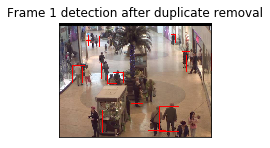

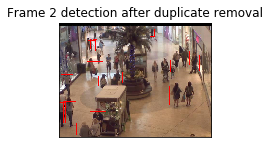

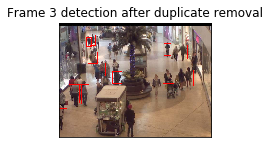

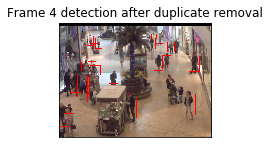

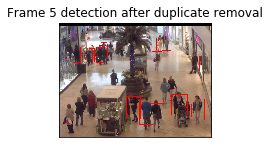

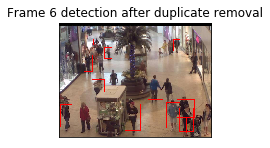

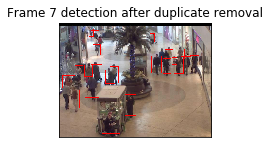

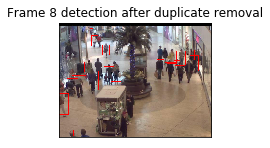

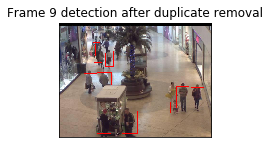

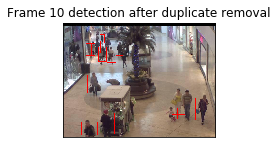

100th frame


KeyboardInterrupt: 

In [12]:
write_people_boxes(frames_path, display=True)